# Medical Insurance Costs Analysis
This notebook analyzes data from [Kaggle's Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance) and aims to answer four main questions. 

1. What is the average age of the patients in the dataset?
2. Where are the patients located?
3. Are insurance costs significantly different between smokers and non-smokers?
4. Do children have a signficant effect of a patient's insurance cost? 

First, let's load the data using Pandas. 

In [2]:
import pandas as pd
import seaborn as sns

insurance_df = pd.read_csv('insurance.csv')

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1. Average age of patients
Since the average is heavily influence by outliers, the median will also be calculated to determine if the average is a meaningful measure of central tendency. 

In [3]:
avg_age = round(insurance_df['age'].mean(), 2)
med_age = round(insurance_df['age'].median(), 2)

print(f'The average age of patients in the dataset is {avg_age}')
print(f'The median age of patients in the dataset is {med_age}')

The average age of patients in the dataset is 39.21
The median age of patients in the dataset is 39.0


Since the average and median values are very close, the average age of 39.21 for patients is a meaningful measure of central tendency in the dataset. 

## 2. Where are the patients located?
Next, the region column will be analyze to determine where are the majority of patients are from. First, let's see what regions we are dealing with. 

In [4]:
distinct_regions = insurance_df['region'].unique()

print(f'There are a total of {len(distinct_regions)} distinct regions in the dataset that include: {distinct_regions}')

There are a total of 4 distinct regions in the dataset that include: ['southwest' 'southeast' 'northwest' 'northeast']


Futhermore, let's determine if the majority of patients are in one region or if patients are evenly distributed among all regions. A dictionary will be created to keep the data organized. 

In [12]:
region_counts = [len(insurance_df.loc[insurance_df['region'] == reg]) for reg in distinct_regions]

regions_dict = dict(zip(distinct_regions, region_counts))

regions_dict

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}

Looks like the patients are very evently distributed over all four regions. Before moving on, let's check do a quick unit test to make sure the data is correct. All the regions row should add up to the full dataframe that was imported. Hence, let do a quick row count check.

### Data Check

In [54]:
insurance_df_row_count = len(insurance_df)
all_regions_count = sum(region_counts)

if insurance_df_row_count == all_regions_count:
    print(f'Row count matches! Insurance_df row count is: {insurance_df_row_count} and total region count is {all_regions_count}')
else:
    print(f'Row count mismatch, data error. Insurance_df row count is: {insurance_df_row_count} and total region count is {all_regions_count}')


Row count matches! Insurance_df row count is: 1338 and total region count is 1338


Awesome! The row count matches. Let's visualize the data to in a bar chart to better see the data.

Text(0, 0.5, 'Patient Count')

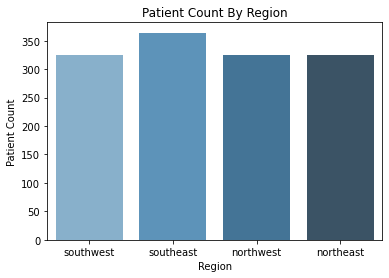

In [57]:
# Create dataframe for easy plotting
regions_patient_count_df = pd.DataFrame(data=regions_dict, index=[0])

ax = sns.barplot(data=regions_patient_count_df, palette="Blues_d")
ax.set_title('Patient Count By Region')
ax.set_xlabel('Region')
ax.set_ylabel('Patient Count')


Looks like the southeast region has the most patients but not my much. All regions are evenly distributed. 

## 3. Are insurance costs significantly different between smokers and non-smokers?
This question is at the core of the project. Let's determine if smokers and non-smokers have a significant pay difference. Let's start by creating two seperate dataframes, one for smokers and the other for non-smokers. 

In [60]:
smokers = insurance_df.loc[insurance_df['smoker'] == 'yes']
non_smokers = insurance_df.loc[insurance_df['smoker'] == 'no'] 

print(f'Total smoker cout: {len(smokers)}')
print(f'Total non-smoker cout: {len(non_smokers)}')


Total smoker cout: 274
Total non-smoker cout: 1064
